## Session 2.1: Manipulating data with Pandas (live coding session)

In [4]:
import pandas as pd
#this time the file is separated by tabs
mouse_data = pandas.read_csv('data/GRCm38.gff3', sep='\t')

In [5]:
#lets look at the data
mouse_data.head()

,seqid,source,type,start,end,score,strand,phase,attributes,gbid
0,NC_000073.6,Gnomon,CDS,49420174,49420340,.,+,1,ID=cds30916;Parent=rna43633;Dbxref=GeneID:7828...,XP_006541352.1
1,NC_000067.6,Gnomon,CDS,64607740,64608137,.,-,2,"ID=cds1286;Parent=rna1815;Dbxref=GeneID:67099,...",XP_006496267.1
2,NC_000071.6,BestRefSeq,exon,24544129,24544373,.,-,.,ID=id325971;Parent=rna28488;Dbxref=GeneID:2310...,NM_177676.6
3,NC_000074.6,Gnomon,exon,71655663,71655741,.,-,.,ID=id568467;Parent=rna50916;Dbxref=GeneID:3820...,XM_017312883.1
4,NC_000068.7,Gnomon,CDS,135932249,135932302,.,+,1,ID=cds9263;Parent=rna13273;Dbxref=GeneID:18798...,XP_006499009.1


In [7]:
#good to see if there is any info missing or mixed info type and how many rows and columns there are
mouse_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29998 entries, 0 to 29997
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   seqid       29998 non-null  object
 1   source      29998 non-null  object
 2   type        29998 non-null  object
 3   start       29998 non-null  int64 
 4   end         29998 non-null  int64 
 5   score       29998 non-null  object
 6   strand      29998 non-null  object
 7   phase       29998 non-null  object
 8   attributes  29998 non-null  object
 9   gbid        28741 non-null  object
dtypes: int64(2), object(8)
memory usage: 2.3+ MB


In [9]:
#shows summary statistics for all data
mouse_data.describe()

,start,end
count,2.999800e+04,2.999800e+04
mean,7.446804e+07,7.448115e+07
std,4.490600e+07,4.490355e+07
min,1.000000e+00,2.010000e+03
25%,3.497905e+07,3.499334e+07
50%,7.334594e+07,7.336266e+07
75%,1.088366e+08,1.088385e+08
max,1.951710e+08,1.951712e+08


In [10]:
#data looks like this:
mouse_data.head()

,seqid,source,type,start,end,score,strand,phase,attributes,gbid
0,NC_000073.6,Gnomon,CDS,49420174,49420340,.,+,1,ID=cds30916;Parent=rna43633;Dbxref=GeneID:7828...,XP_006541352.1
1,NC_000067.6,Gnomon,CDS,64607740,64608137,.,-,2,"ID=cds1286;Parent=rna1815;Dbxref=GeneID:67099,...",XP_006496267.1
2,NC_000071.6,BestRefSeq,exon,24544129,24544373,.,-,.,ID=id325971;Parent=rna28488;Dbxref=GeneID:2310...,NM_177676.6
3,NC_000074.6,Gnomon,exon,71655663,71655741,.,-,.,ID=id568467;Parent=rna50916;Dbxref=GeneID:3820...,XM_017312883.1
4,NC_000068.7,Gnomon,CDS,135932249,135932302,.,+,1,ID=cds9263;Parent=rna13273;Dbxref=GeneID:18798...,XP_006499009.1


In [11]:
#what type of our data
mouse_data_type = mouse_data.iloc[:,[2]]
type(mouse_data_type)

pandas.core.frame.DataFrame

In [12]:
mouse_data_type.head()

,type
0,CDS
1,CDS
2,exon
3,exon
4,CDS


In [15]:
mouse_data_type = mouse_data.iloc[:,2:3]
type(mouse_data_type)

pandas.core.frame.DataFrame

In [16]:
#data looks the same because we selected just 1 column between 2 and 3
mouse_data_type.head()

,type
0,CDS
1,CDS
2,exon
3,exon
4,CDS


In [17]:
mouse_data['type'].head()

0     CDS
1     CDS
2    exon
3    exon
4     CDS
Name: type, dtype: object

In [18]:
type(mouse_data['type'])

pandas.core.series.Series

In [13]:
#which are the unique terms in the column type
mouse_data['type'].unique()

array(['CDS', 'exon', 'mRNA', 'gene', 'cDNA_match', 'ncRNA', 'match',
       'transcript', 'region', 'V_gene_segment', 'primary_transcript',
       'tRNA', 'J_gene_segment'], dtype=object)

In [14]:
#how many values found in each term in the type column
feature_counts = mouse_data['type'].value_counts()
print(feature_counts)

exon                  15604
CDS                   12177
mRNA                    991
gene                    619
ncRNA                   271
transcript              117
cDNA_match              105
match                    82
primary_transcript       14
V_gene_segment            9
tRNA                      4
region                    3
J_gene_segment            2
Name: type, dtype: int64


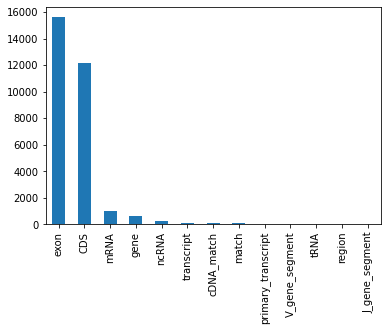

In [19]:
#lets look at this spread of values of the type column
%matplotlib inline
feature_counts.plot(kind='bar')

In [20]:
mouse_data.head()

,seqid,source,type,start,end,score,strand,phase,attributes,gbid
0,NC_000073.6,Gnomon,CDS,49420174,49420340,.,+,1,ID=cds30916;Parent=rna43633;Dbxref=GeneID:7828...,XP_006541352.1
1,NC_000067.6,Gnomon,CDS,64607740,64608137,.,-,2,"ID=cds1286;Parent=rna1815;Dbxref=GeneID:67099,...",XP_006496267.1
2,NC_000071.6,BestRefSeq,exon,24544129,24544373,.,-,.,ID=id325971;Parent=rna28488;Dbxref=GeneID:2310...,NM_177676.6
3,NC_000074.6,Gnomon,exon,71655663,71655741,.,-,.,ID=id568467;Parent=rna50916;Dbxref=GeneID:3820...,XM_017312883.1
4,NC_000068.7,Gnomon,CDS,135932249,135932302,.,+,1,ID=cds9263;Parent=rna13273;Dbxref=GeneID:18798...,XP_006499009.1


In [22]:
#calculate the size of the genes
mouse_data['len'] = mouse_data.end - mouse_data.start + 1
mouse_data.head()

,seqid,source,type,start,end,score,strand,phase,attributes,gbid,len
0,NC_000073.6,Gnomon,CDS,49420174,49420340,.,+,1,ID=cds30916;Parent=rna43633;Dbxref=GeneID:7828...,XP_006541352.1,167
1,NC_000067.6,Gnomon,CDS,64607740,64608137,.,-,2,"ID=cds1286;Parent=rna1815;Dbxref=GeneID:67099,...",XP_006496267.1,398
2,NC_000071.6,BestRefSeq,exon,24544129,24544373,.,-,.,ID=id325971;Parent=rna28488;Dbxref=GeneID:2310...,NM_177676.6,245
3,NC_000074.6,Gnomon,exon,71655663,71655741,.,-,.,ID=id568467;Parent=rna50916;Dbxref=GeneID:3820...,XM_017312883.1,79
4,NC_000068.7,Gnomon,CDS,135932249,135932302,.,+,1,ID=cds9263;Parent=rna13273;Dbxref=GeneID:18798...,XP_006499009.1,54


In [23]:
#select just the exons
mouse_exons = mouse_data[mouse_data.type=='exon']
mouse_exons.head()

,seqid,source,type,start,end,score,strand,phase,attributes,gbid,len
2,NC_000071.6,BestRefSeq,exon,24544129,24544373,.,-,.,ID=id325971;Parent=rna28488;Dbxref=GeneID:2310...,NM_177676.6,245
3,NC_000074.6,Gnomon,exon,71655663,71655741,.,-,.,ID=id568467;Parent=rna50916;Dbxref=GeneID:3820...,XM_017312883.1,79
7,NC_000073.6,Gnomon,exon,118329486,118329612,.,+,.,ID=id520282;Parent=rna46416;Dbxref=GeneID:1026...,XR_378454.2,127
8,NC_000076.6,Gnomon,exon,5175722,5175928,.,-,.,ID=id673061;Parent=rna60010;Dbxref=GeneID:6400...,XM_017314047.1,207
9,NC_000083.6,Gnomon,exon,24585923,24586066,.,+,.,ID=id1054336;Parent=rna94586;Dbxref=GeneID:187...,XM_017317334.1,144


In [24]:
#select only exons and of size bigger than 500bp
long_mouse_exons = mouse_data[(mouse_data.type=='exon') & (mouse_data.len > 500)]
long_mouse_exons.head()

,seqid,source,type,start,end,score,strand,phase,attributes,gbid,len
25,NC_000071.6,Gnomon,exon,52622299,52622981,.,-,.,ID=id341017;Parent=rna29660;Dbxref=GeneID:1026...,XR_376954.1,683
26,NC_000075.6,Gnomon,exon,49502134,49505563,.,-,.,ID=id621844;Parent=rna55895;Dbxref=GeneID:1796...,XM_006510062.1,3430
68,NC_000083.6,Gnomon,exon,65637507,65639029,.,-,.,ID=id1085508;Parent=rna97473;Dbxref=GeneID:213...,XM_011246354.2,1523
90,NC_000067.6,Gnomon,exon,157127821,157128922,.,+,.,ID=id69632;Parent=rna5050;Dbxref=GeneID:102632...,XM_006497076.3,1102
99,NC_000086.7,BestRefSeq,exon,13846008,13846556,.,-,.,ID=id1164540;Parent=rna104941;Dbxref=GeneID:12...,NM_001284505.1,549


In [25]:
len(long_mouse_exons)

1586

## Exercise
Plot the length of exons from the mouse dataframe.

In [30]:
mouse_exons.head()

,seqid,source,type,start,end,score,strand,phase,attributes,gbid,len
2,NC_000071.6,BestRefSeq,exon,24544129,24544373,.,-,.,ID=id325971;Parent=rna28488;Dbxref=GeneID:2310...,NM_177676.6,245
3,NC_000074.6,Gnomon,exon,71655663,71655741,.,-,.,ID=id568467;Parent=rna50916;Dbxref=GeneID:3820...,XM_017312883.1,79
7,NC_000073.6,Gnomon,exon,118329486,118329612,.,+,.,ID=id520282;Parent=rna46416;Dbxref=GeneID:1026...,XR_378454.2,127
8,NC_000076.6,Gnomon,exon,5175722,5175928,.,-,.,ID=id673061;Parent=rna60010;Dbxref=GeneID:6400...,XM_017314047.1,207
9,NC_000083.6,Gnomon,exon,24585923,24586066,.,+,.,ID=id1054336;Parent=rna94586;Dbxref=GeneID:187...,XM_017317334.1,144


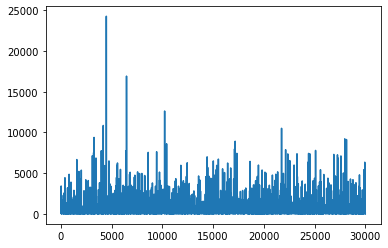

In [31]:
#what is the spread of the lengths of the exons
%matplotlib inline
mouse_exons['len'].plot()

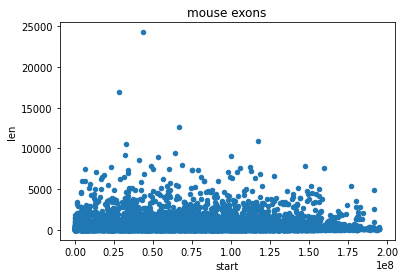

In [33]:
#see if there is a correlation between the length of the exons and the start of the gene
%matplotlib inline
mouse_exons.plot.scatter(x='start', y='len', title='mouse exons')

## Re-ordering columns and re-indexing data frame

In [26]:
mouse_data.head()

,seqid,source,type,start,end,score,strand,phase,attributes,gbid,len
0,NC_000073.6,Gnomon,CDS,49420174,49420340,.,+,1,ID=cds30916;Parent=rna43633;Dbxref=GeneID:7828...,XP_006541352.1,167
1,NC_000067.6,Gnomon,CDS,64607740,64608137,.,-,2,"ID=cds1286;Parent=rna1815;Dbxref=GeneID:67099,...",XP_006496267.1,398
2,NC_000071.6,BestRefSeq,exon,24544129,24544373,.,-,.,ID=id325971;Parent=rna28488;Dbxref=GeneID:2310...,NM_177676.6,245
3,NC_000074.6,Gnomon,exon,71655663,71655741,.,-,.,ID=id568467;Parent=rna50916;Dbxref=GeneID:3820...,XM_017312883.1,79
4,NC_000068.7,Gnomon,CDS,135932249,135932302,.,+,1,ID=cds9263;Parent=rna13273;Dbxref=GeneID:18798...,XP_006499009.1,54


In [27]:
#order the column names according to the order defined
reordered_mouse_data = mouse_data[['source', 'type', 'len']]
reordered_mouse_data.head()

,source,type,len
0,Gnomon,CDS,167
1,Gnomon,CDS,398
2,BestRefSeq,exon,245
3,Gnomon,exon,79
4,Gnomon,CDS,54


In [28]:
mouse_exons.head()

,seqid,source,type,start,end,score,strand,phase,attributes,gbid,len
2,NC_000071.6,BestRefSeq,exon,24544129,24544373,.,-,.,ID=id325971;Parent=rna28488;Dbxref=GeneID:2310...,NM_177676.6,245
3,NC_000074.6,Gnomon,exon,71655663,71655741,.,-,.,ID=id568467;Parent=rna50916;Dbxref=GeneID:3820...,XM_017312883.1,79
7,NC_000073.6,Gnomon,exon,118329486,118329612,.,+,.,ID=id520282;Parent=rna46416;Dbxref=GeneID:1026...,XR_378454.2,127
8,NC_000076.6,Gnomon,exon,5175722,5175928,.,-,.,ID=id673061;Parent=rna60010;Dbxref=GeneID:6400...,XM_017314047.1,207
9,NC_000083.6,Gnomon,exon,24585923,24586066,.,+,.,ID=id1054336;Parent=rna94586;Dbxref=GeneID:187...,XM_017317334.1,144


In [29]:
#made a new index
reindexed_mouse_exons = mouse_exons.reset_index()
reindexed_mouse_exons.head()

,index,seqid,source,type,start,end,score,strand,phase,attributes,gbid,len
0,2,NC_000071.6,BestRefSeq,exon,24544129,24544373,.,-,.,ID=id325971;Parent=rna28488;Dbxref=GeneID:2310...,NM_177676.6,245
1,3,NC_000074.6,Gnomon,exon,71655663,71655741,.,-,.,ID=id568467;Parent=rna50916;Dbxref=GeneID:3820...,XM_017312883.1,79
2,7,NC_000073.6,Gnomon,exon,118329486,118329612,.,+,.,ID=id520282;Parent=rna46416;Dbxref=GeneID:1026...,XR_378454.2,127
3,8,NC_000076.6,Gnomon,exon,5175722,5175928,.,-,.,ID=id673061;Parent=rna60010;Dbxref=GeneID:6400...,XM_017314047.1,207
4,9,NC_000083.6,Gnomon,exon,24585923,24586066,.,+,.,ID=id1054336;Parent=rna94586;Dbxref=GeneID:187...,XM_017317334.1,144
